In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.data import brick

In [2]:
image = brick().astype(np.float32)
image /= image.max()
k = 0.01
thresh = 0.01

### Definir kernels

In [4]:
# Sobel
Sobelx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

Sobely = Sobelx.T

# Gaussiano
Gaussian = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]])/16

# Convolucion
convolucion = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9 

In [5]:
def corner_response(image, k=k):
    # Calcular derivadas
    dx = cv2.filter2D(image, ddepth=-1, kernel=Sobelx)
    dy = cv2.filter2D(image, ddepth=-1, kernel=Sobely)

    # Filtro Gaussiano
    A = cv2.filter2D(dx*dx, ddepth=-1, kernel=G)
    B = cv2.filter2D(dy*dy, ddepth=-1, kernel=G)
    C = cv2.filter2D(dx*dy, ddepth=-1, kernel=G)

    return (A*B - (C*C)) - k*(A + B)*(A + B)


def harrisCorners(image, k=k):
    R = corner_response(image, k)

    # Centroides
    _, _, _, centroids = cv2.connectedComponentsWithStats(np.uint8(R > 1e-2))
    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    return cv2.cornerSubPix(image, np.float32(centroids), (9,9), (-1,-1), criteria)


def convolucion(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    # Calcular el padding necesario
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Añadir padding a la imagen original
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), 'constant')
    
    # Crear una imagen de salida
    output = np.zeros_like(image)
    
    # Aplicar la operación de convolución
    for x in range(image_height):
        for y in range(image_width):
            # Realizar la multiplicación elemento a elemento y la suma
            output[x, y] = (kernel * padded_image[x:x+kernel_height, y:y+kernel_width]).sum()
    
    
    return output


In [6]:
corners = harrisCorners(image)

image_out = np.dstack((image, image, image))
for (x, y) in corners:
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    cv2.circle(image_out, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

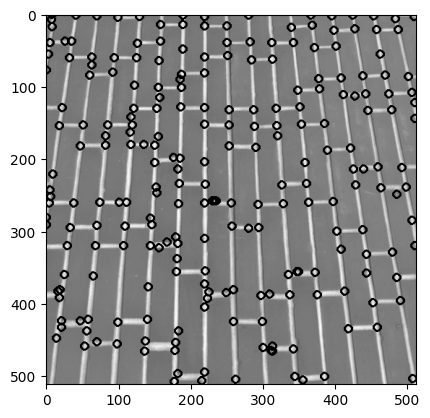

In [7]:
for x, y in corners:
    cv2.circle(image, (int(x), int(y)), radius=5, color=(255), thickness=1)
    cv2.circle(image, (int(x), int(y)), radius=5, color=(0), thickness=2)

plt.imshow(image, cmap='gray')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


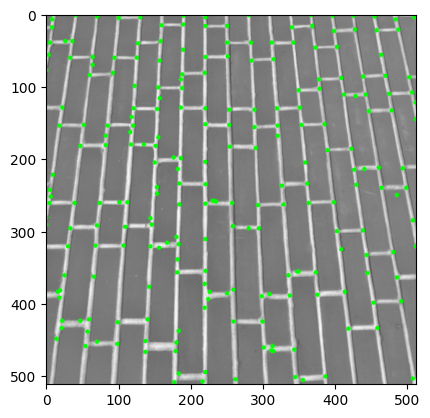

In [8]:
plt.imshow(image_out)